# Morphological operators
- Sets of kernels that can achieve effects, like reducing noise. Previously saw kernels on blurring and smoothing. 
- Certain operators are good at reducing black poitns on a white background (and vice versa)
- Other kernels can add erosion and dilation effect that can add or erode image.

Are just specialied kernels that achieve ceratin effect. 

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
def show_image(image, color=None):
    fig = plt.figure(figsize=(22, 20))
    ax = fig.add_subplot(111)
    ax.imshow(image, cmap='gray')
    plt.show()

In [39]:
def load_img():
    balnk_image = np.zeros((600,600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(balnk_image, text='ABCDE', org=(50, 300), fontFace=font, fontScale=5, color=(255,255,255),thickness=30)
    return balnk_image

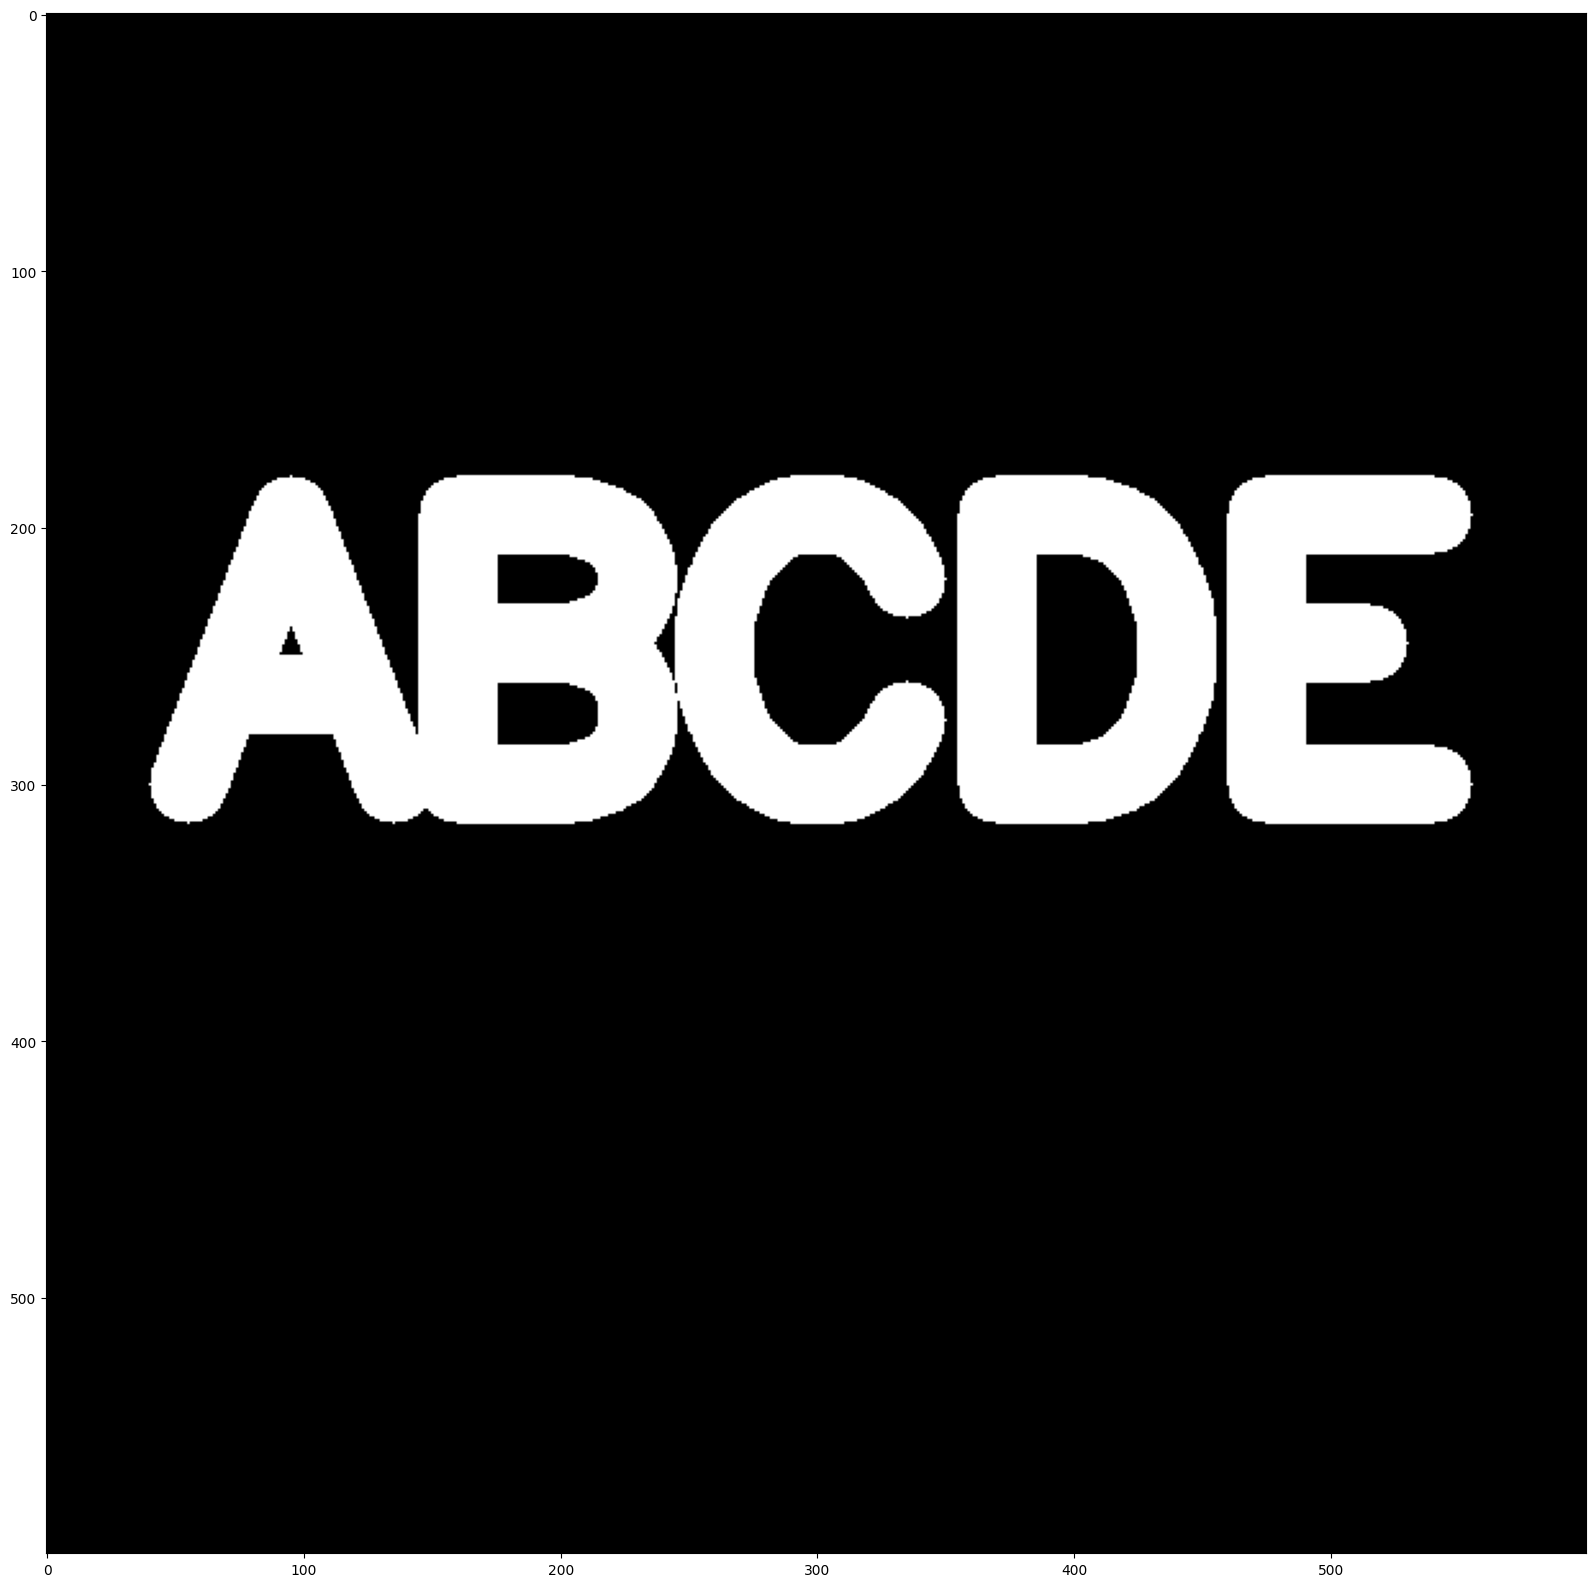

In [27]:
show_image(load_img())

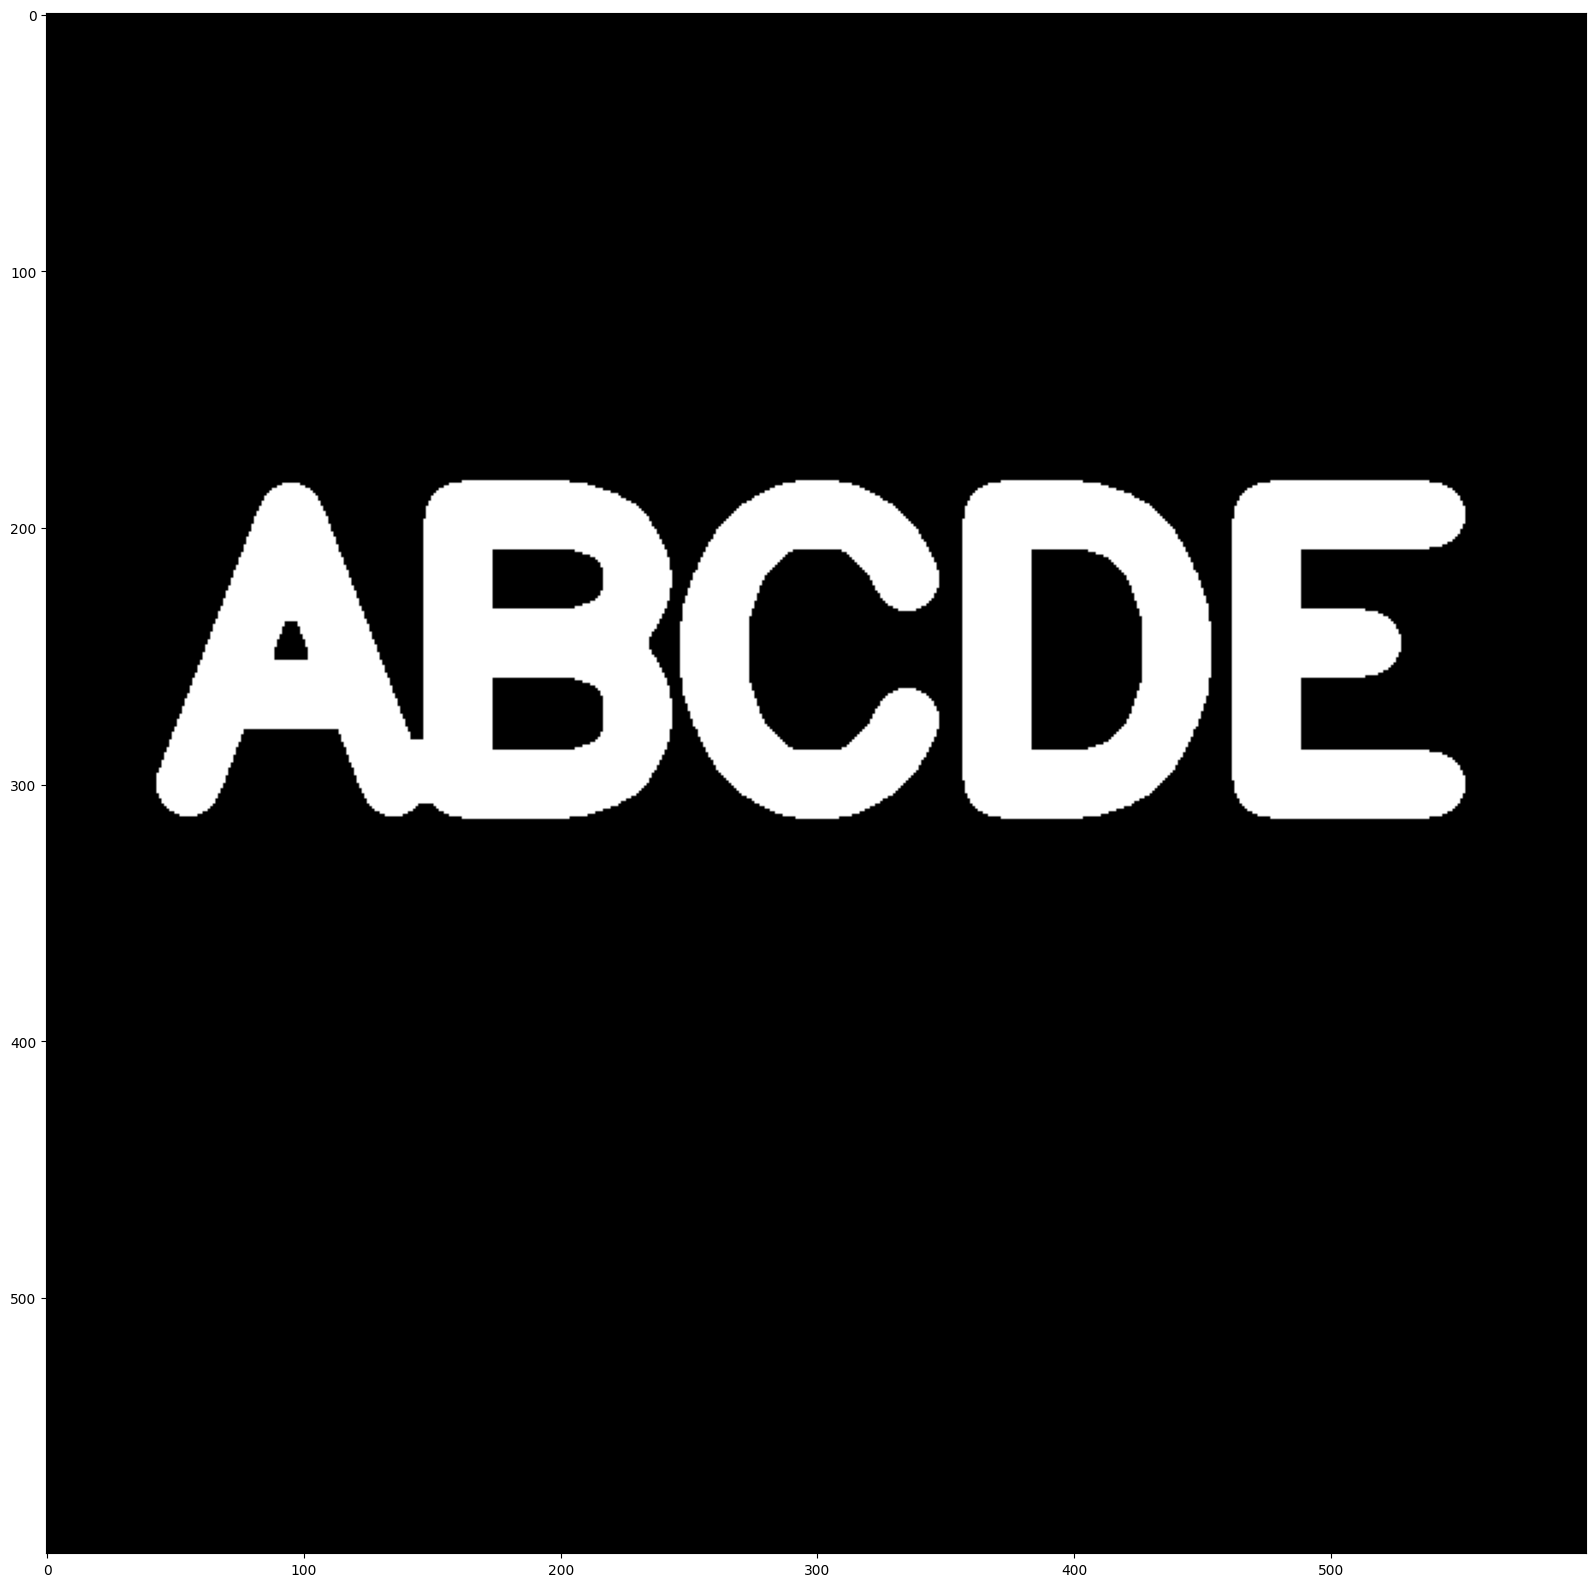

In [20]:
# now we will try to erode away the boundary between text and background
kernel = np.ones((5,5), dtype=np.uint8) # can play with size of kernel
img = load_img()
result = cv2.erode(img, kernel, iterations=1) # iteration = how many passes want to do
show_image(result)

# Erosion
now we will try to erode away the boundary between text and background

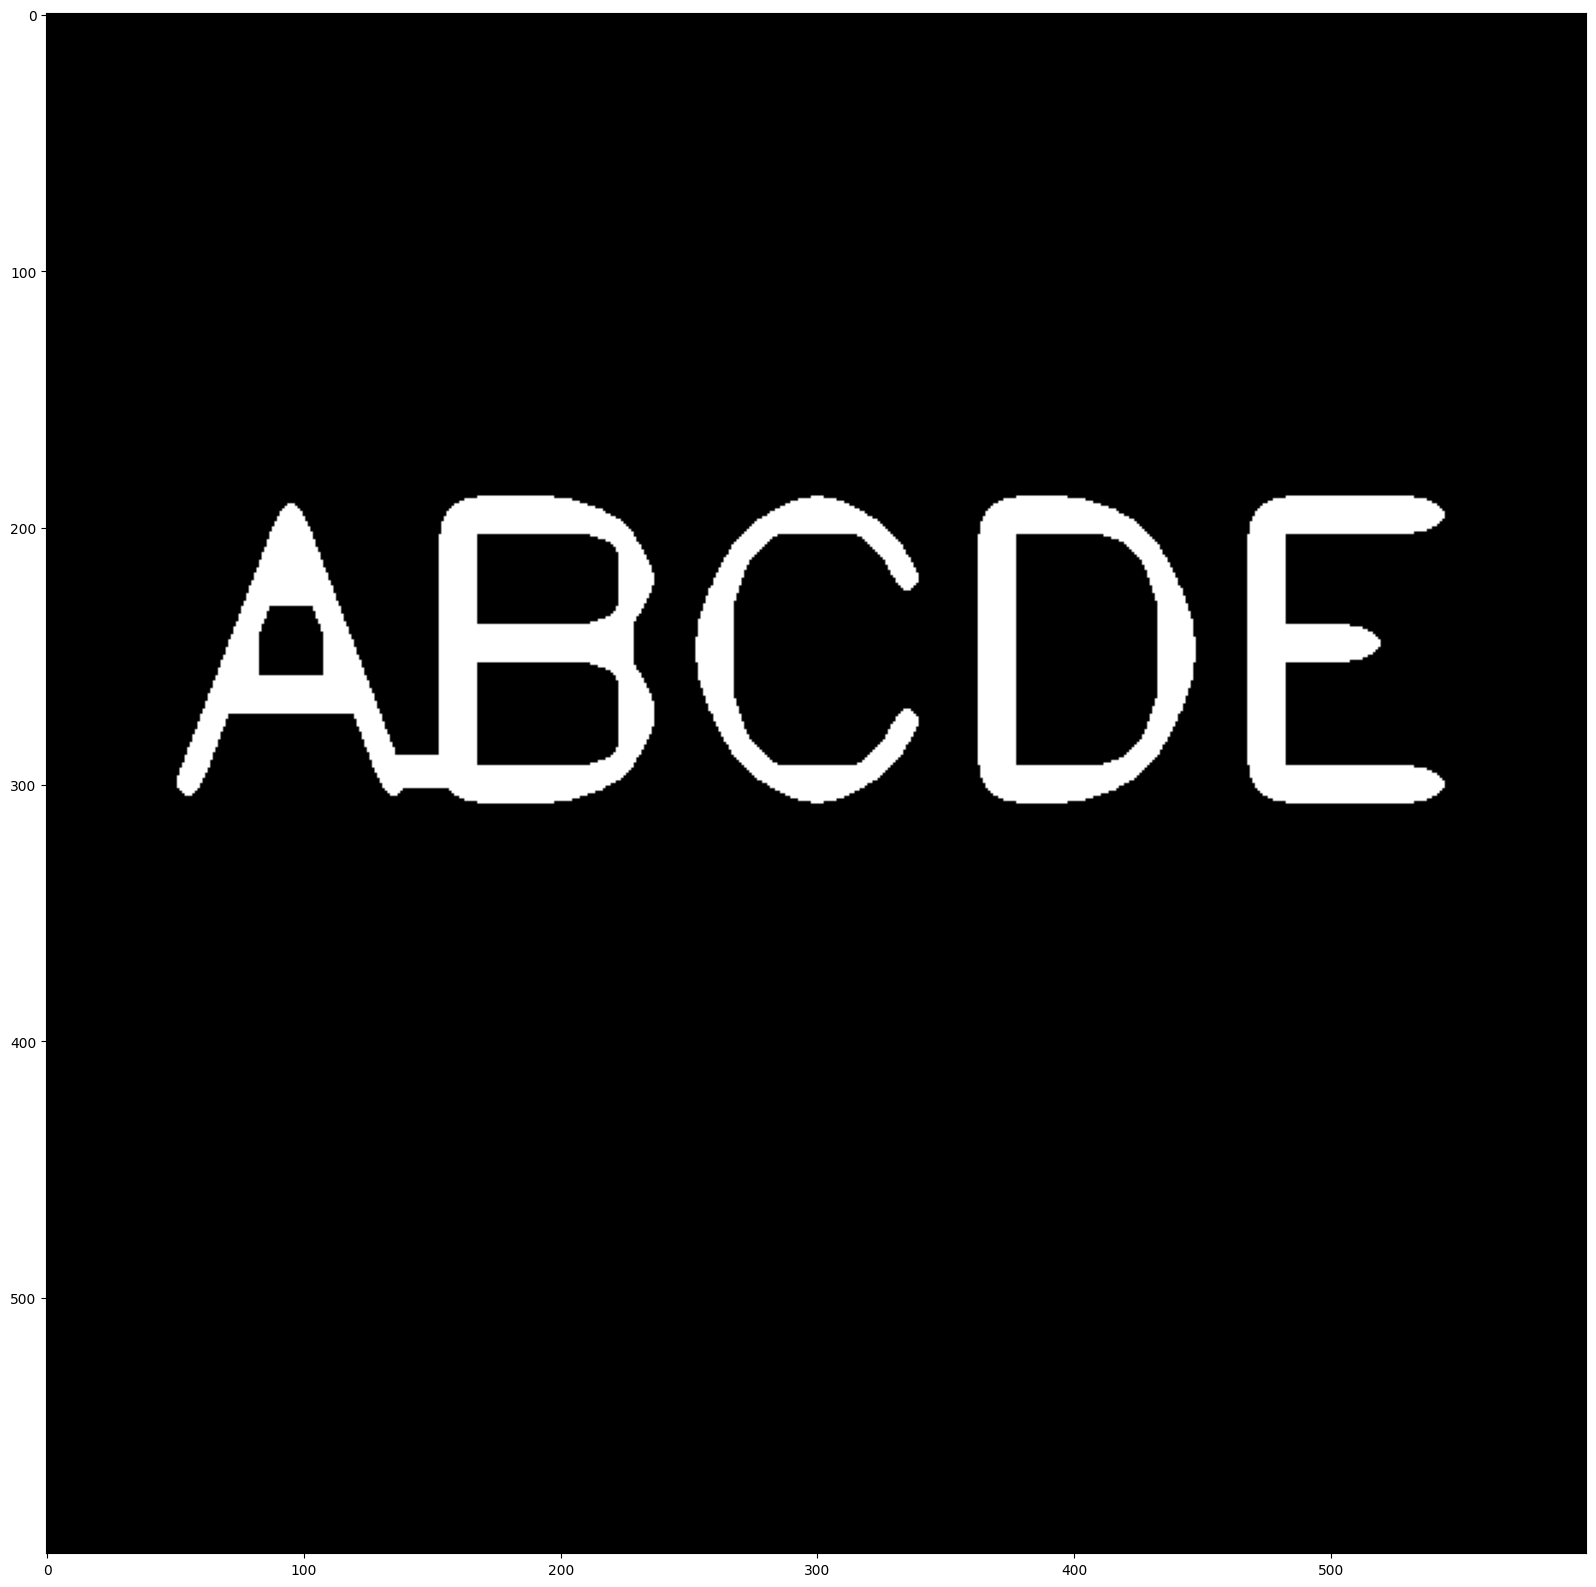

In [28]:
# now we will try to erode away the boundary between text and background
kernel = np.ones((5,5), dtype=np.uint8) # can play with size of kernel
img = load_img()
result = cv2.erode(img, kernel, iterations=4) # iteration = how many passes want to do
show_image(result)

# Opening
Opening is erosion followed my dilation. Dialtion is the opposite of erosion, end up adding more to foregound. But opening is useful to remove background noise

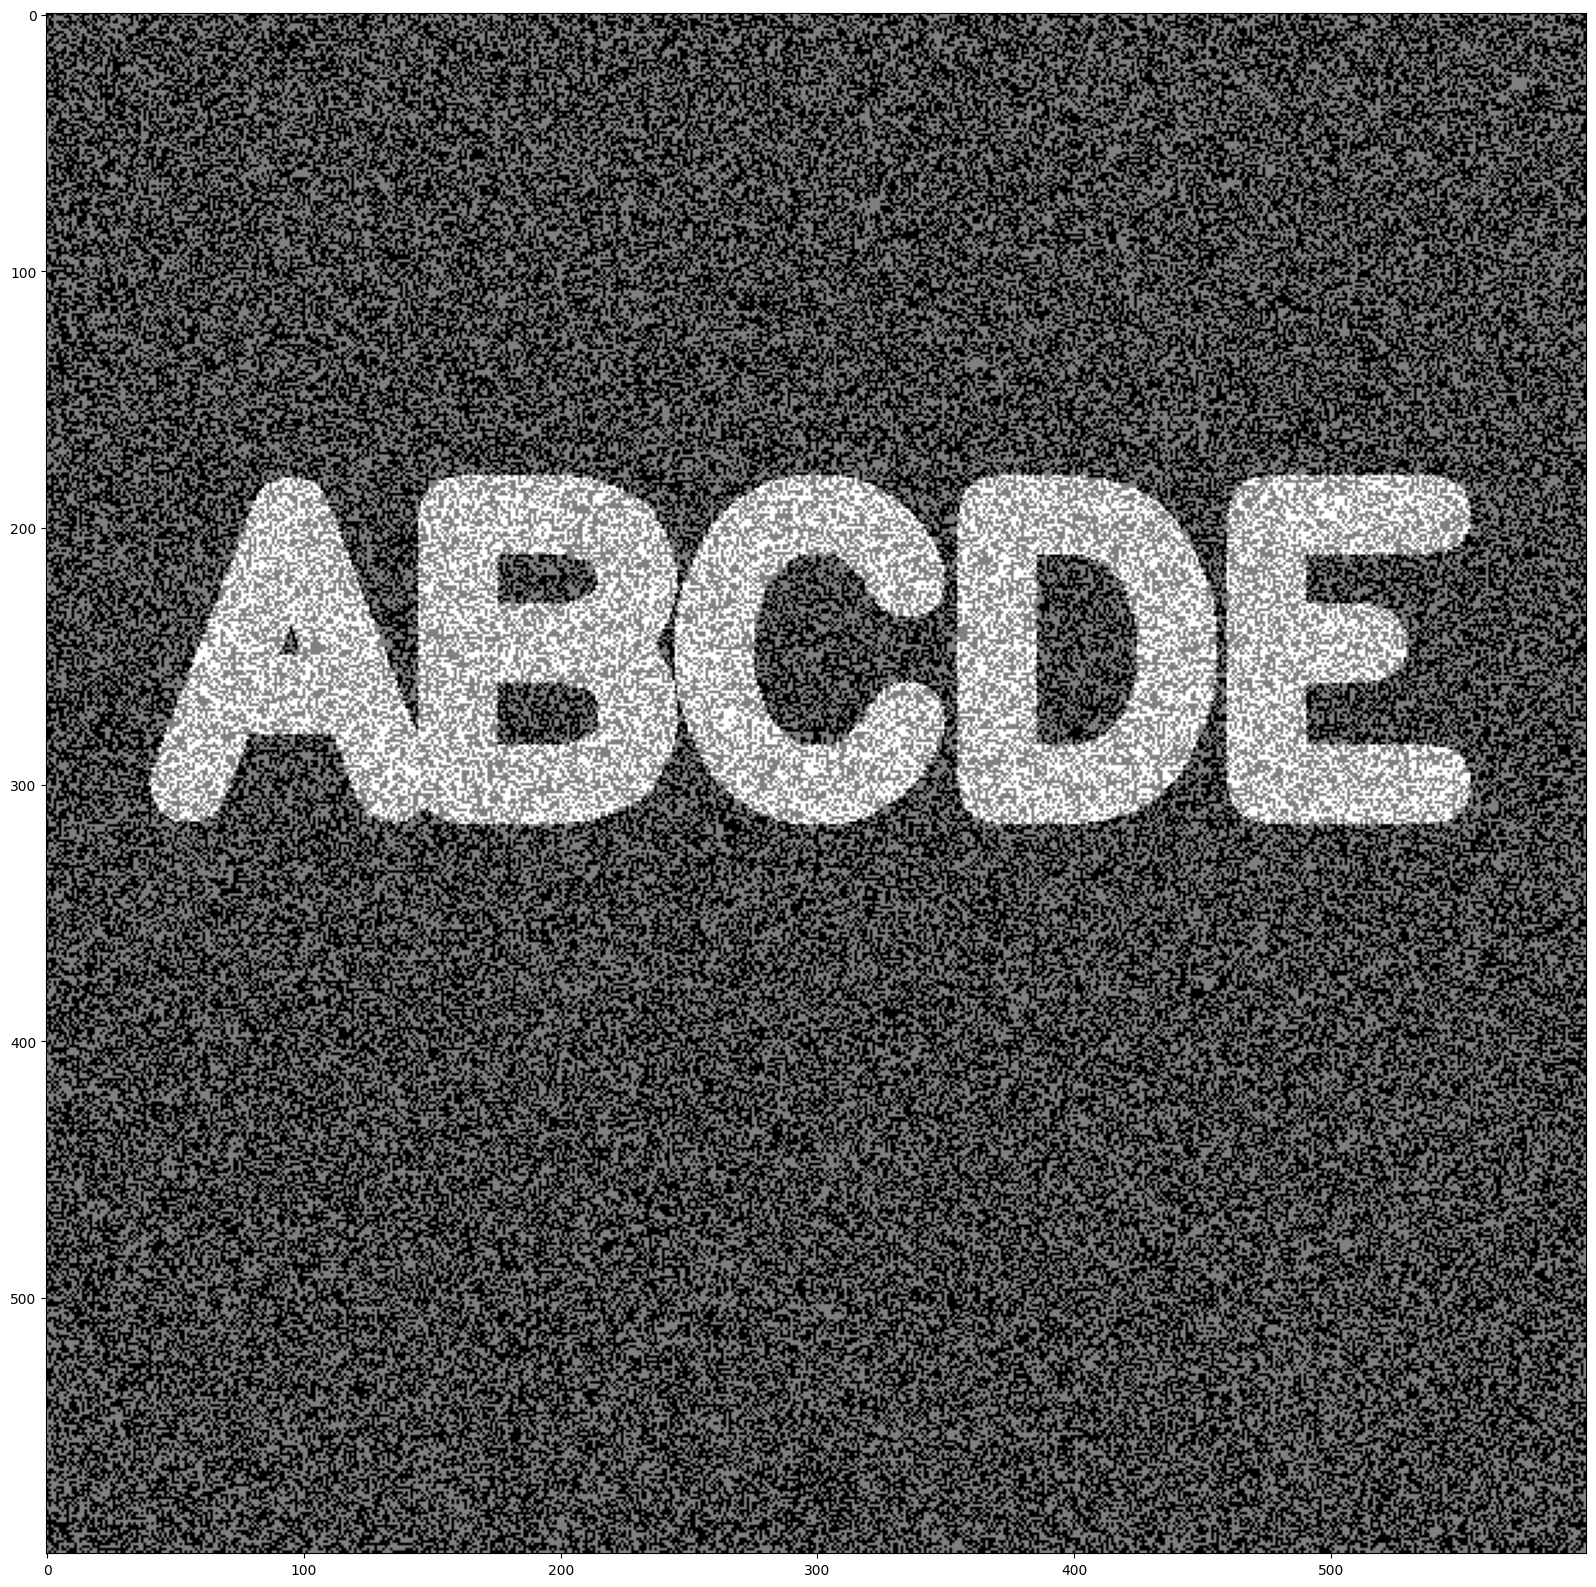

In [44]:
img = load_img()
white_noise = np.random.randint(low=0, high=2, size=(600,600)) # this is just noise
white_noise *= 255 # convert values between 0 and 255. so same scale as original image
noise_img = img + white_noise # add noise to the image
show_image(noise_img)

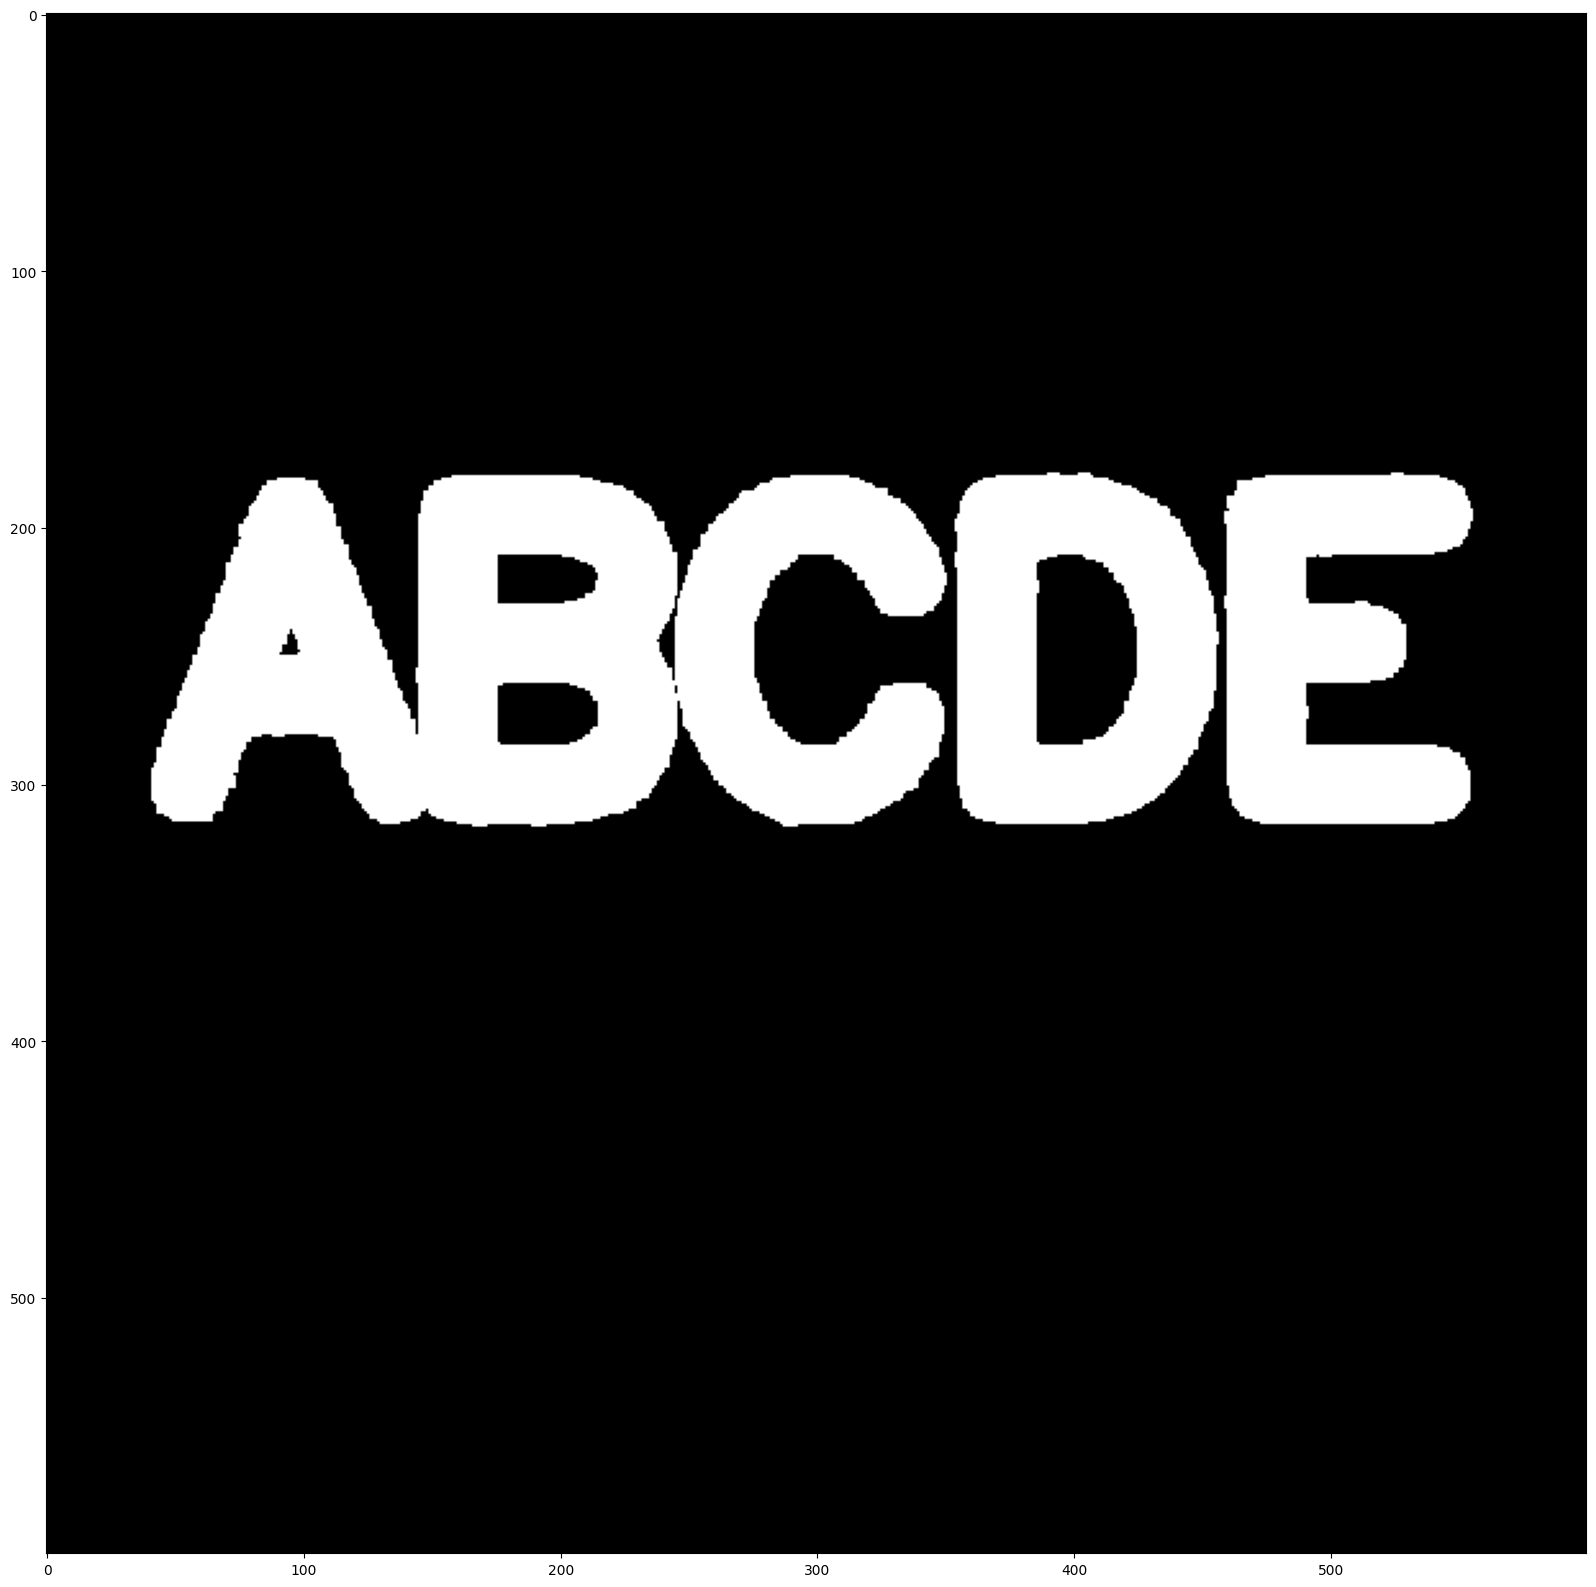

In [43]:
# works well in grayscle images
opening = cv2.morphologyEx(noise_img, cv2.MORPH_OPEN, kernel) #noise image, then pass morp open, and kernel
show_image(opening) # clear out noise without modifying that much of original image. 

# Closing
Now to remove when an image has foregournd noise

In [47]:
img = load_img()
black_noise =  np.random.randint(low=0, high=2, size=(600,600)) # the high 2 is exlusive, so it is only 0 or 1. 
black_noise *= -255 
black_noise # this only has 0 or -255. it will not affect the black, but the white yes

array([[   0,    0, -255, ...,    0,    0, -255],
       [   0, -255,    0, ...,    0, -255,    0],
       [   0, -255, -255, ..., -255,    0, -255],
       ...,
       [-255,    0, -255, ..., -255,    0, -255],
       [-255,    0,    0, ..., -255,    0, -255],
       [   0,    0,    0, ...,    0,    0, -255]], dtype=int32)

In [49]:
black_noise_img = img + black_noise
black_noise_img

array([[   0.,    0., -255., ...,    0.,    0., -255.],
       [   0., -255.,    0., ...,    0., -255.,    0.],
       [   0., -255., -255., ..., -255.,    0., -255.],
       ...,
       [-255.,    0., -255., ..., -255.,    0., -255.],
       [-255.,    0.,    0., ..., -255.,    0., -255.],
       [   0.,    0.,    0., ...,    0.,    0., -255.]])

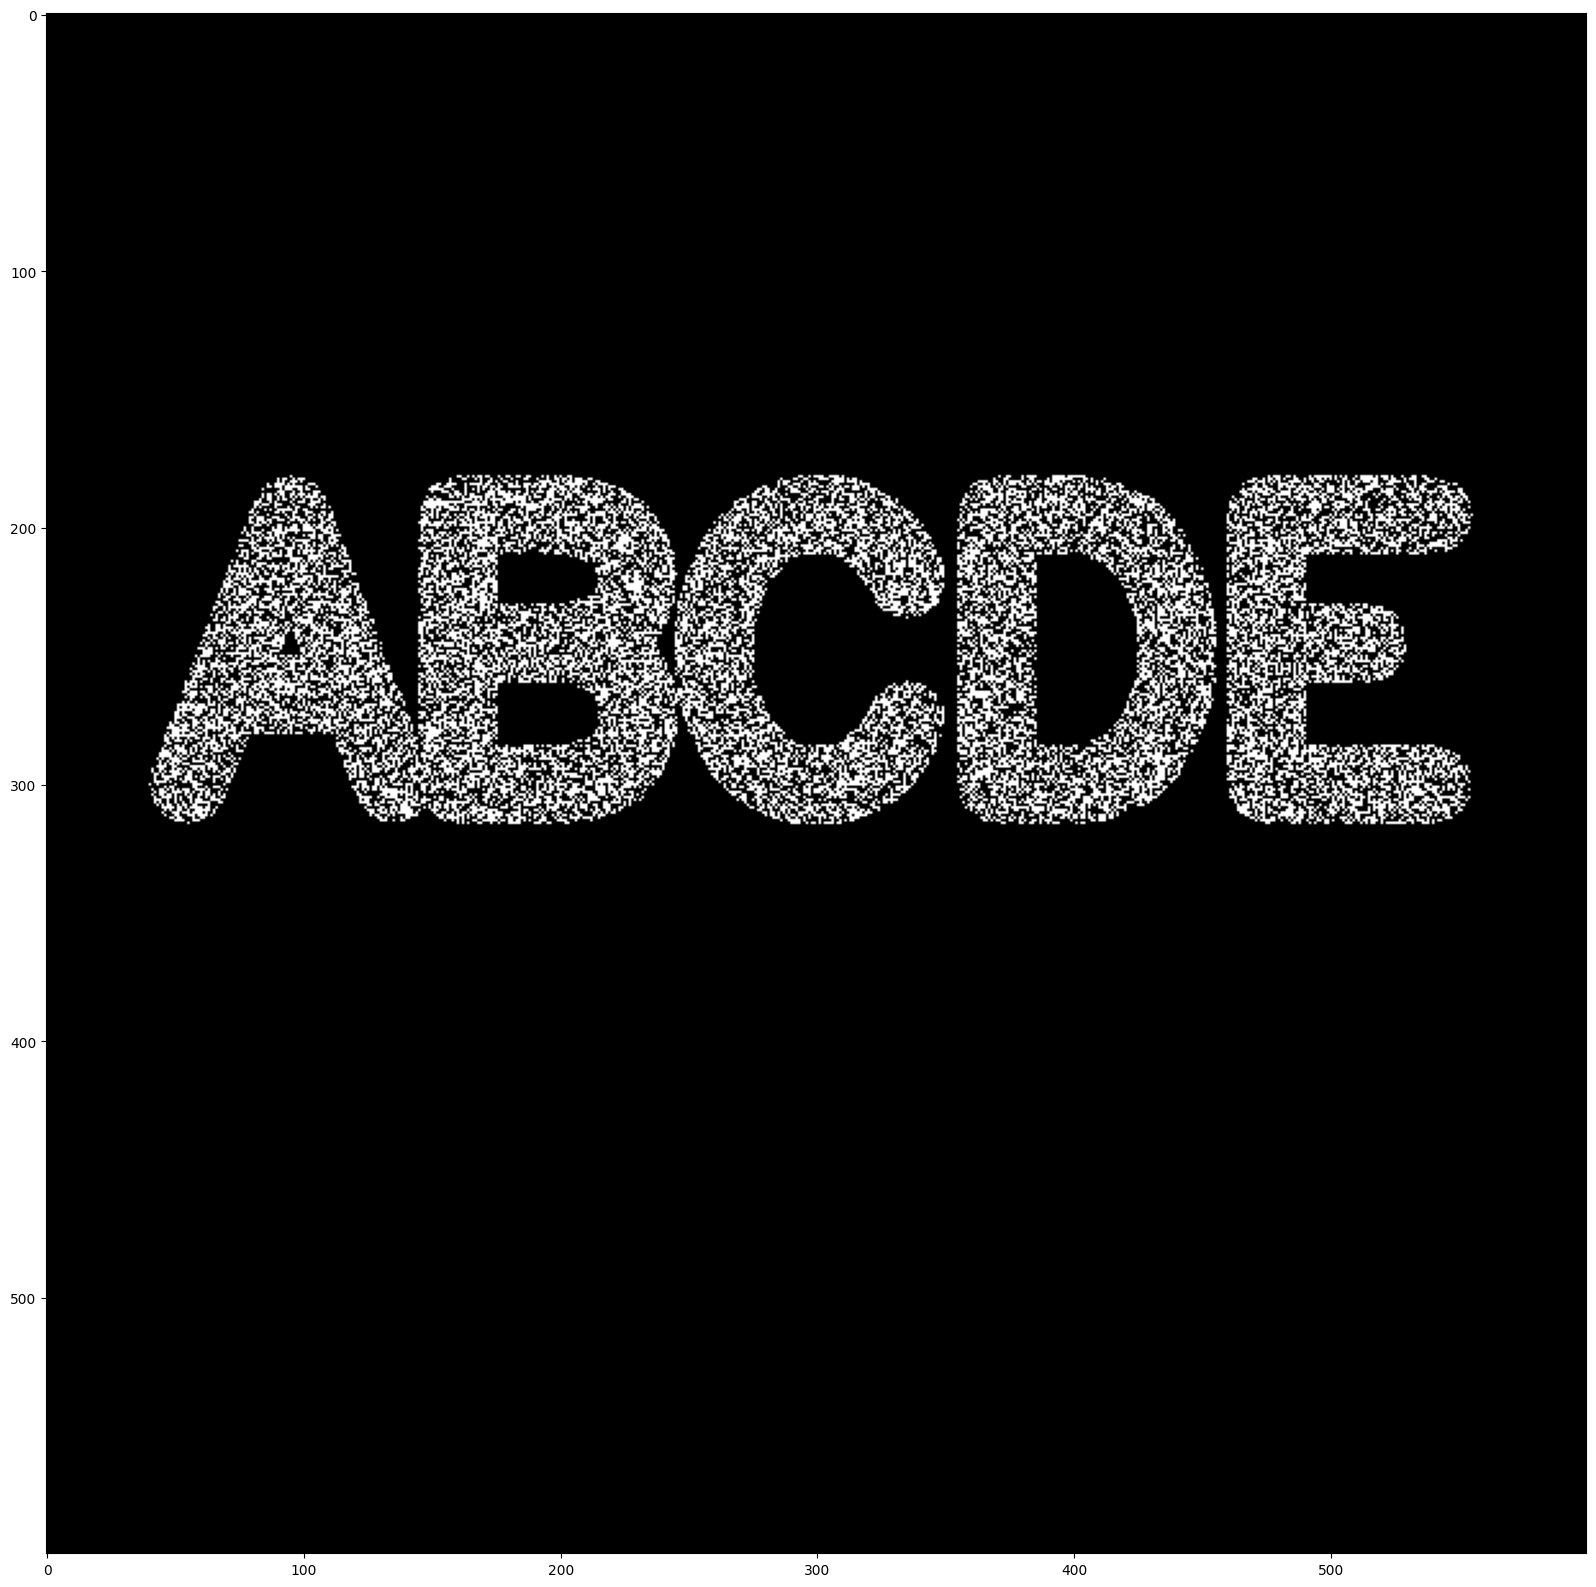

In [50]:
black_noise_img[black_noise_img == -255] = 0 # black noise image where values are -255, change that back to zero
show_image(black_noise_img)

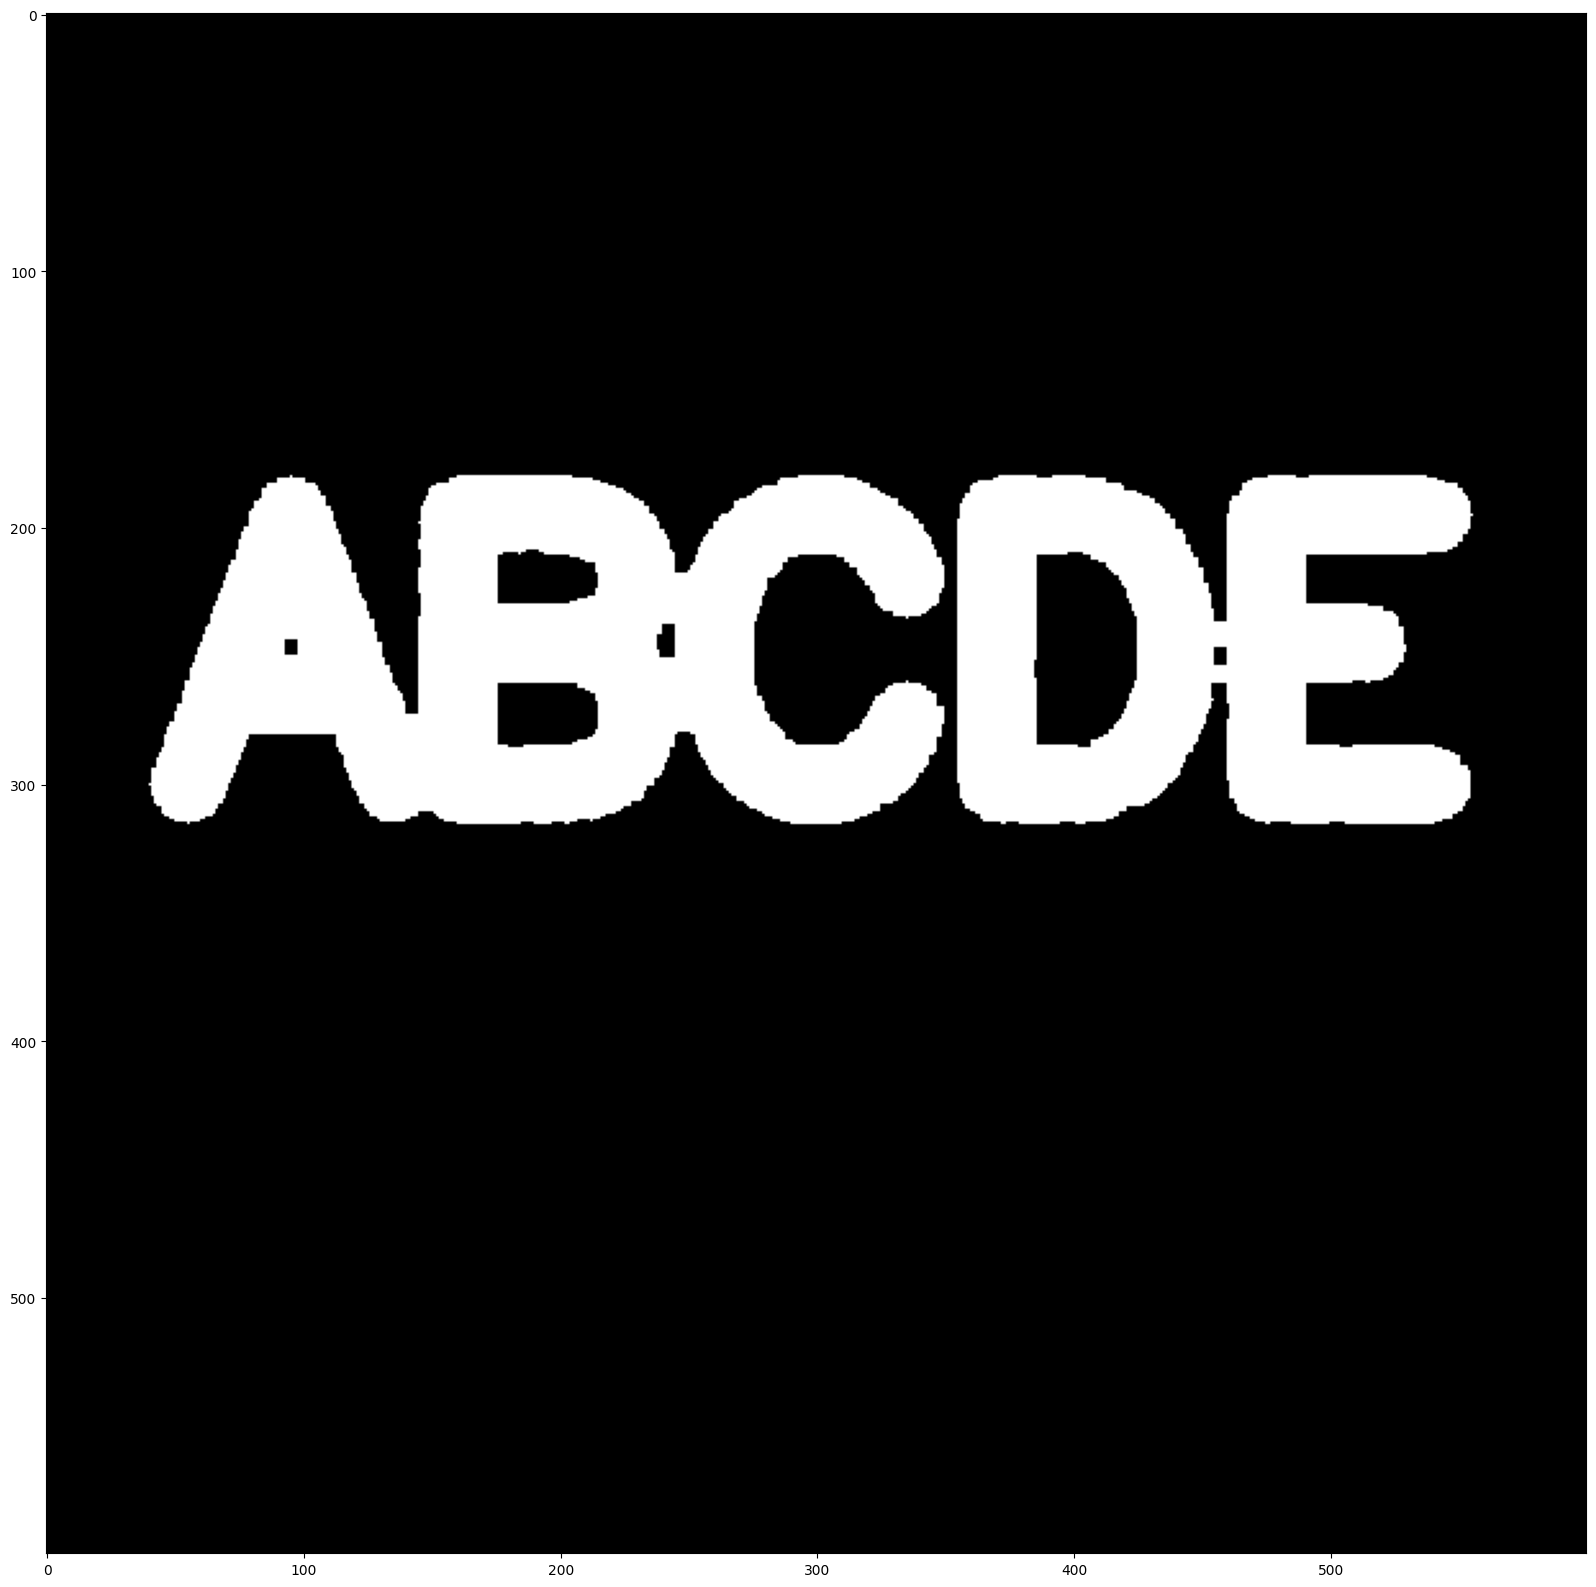

In [51]:
closing = cv2.morphologyEx(black_noise_img, cv2.MORPH_CLOSE, kernel)
show_image(closing)

# Morphological gradient
- Takes difference between dilation and erosion of an image. 
- if added erosion to an image, the edges will thing. if added dilation, then adding more and letters more bubbly. The morphological gradinet takes difference between those two
- With text, what ends up happening is more just taking the edges between the two methods and is useful for edge detection

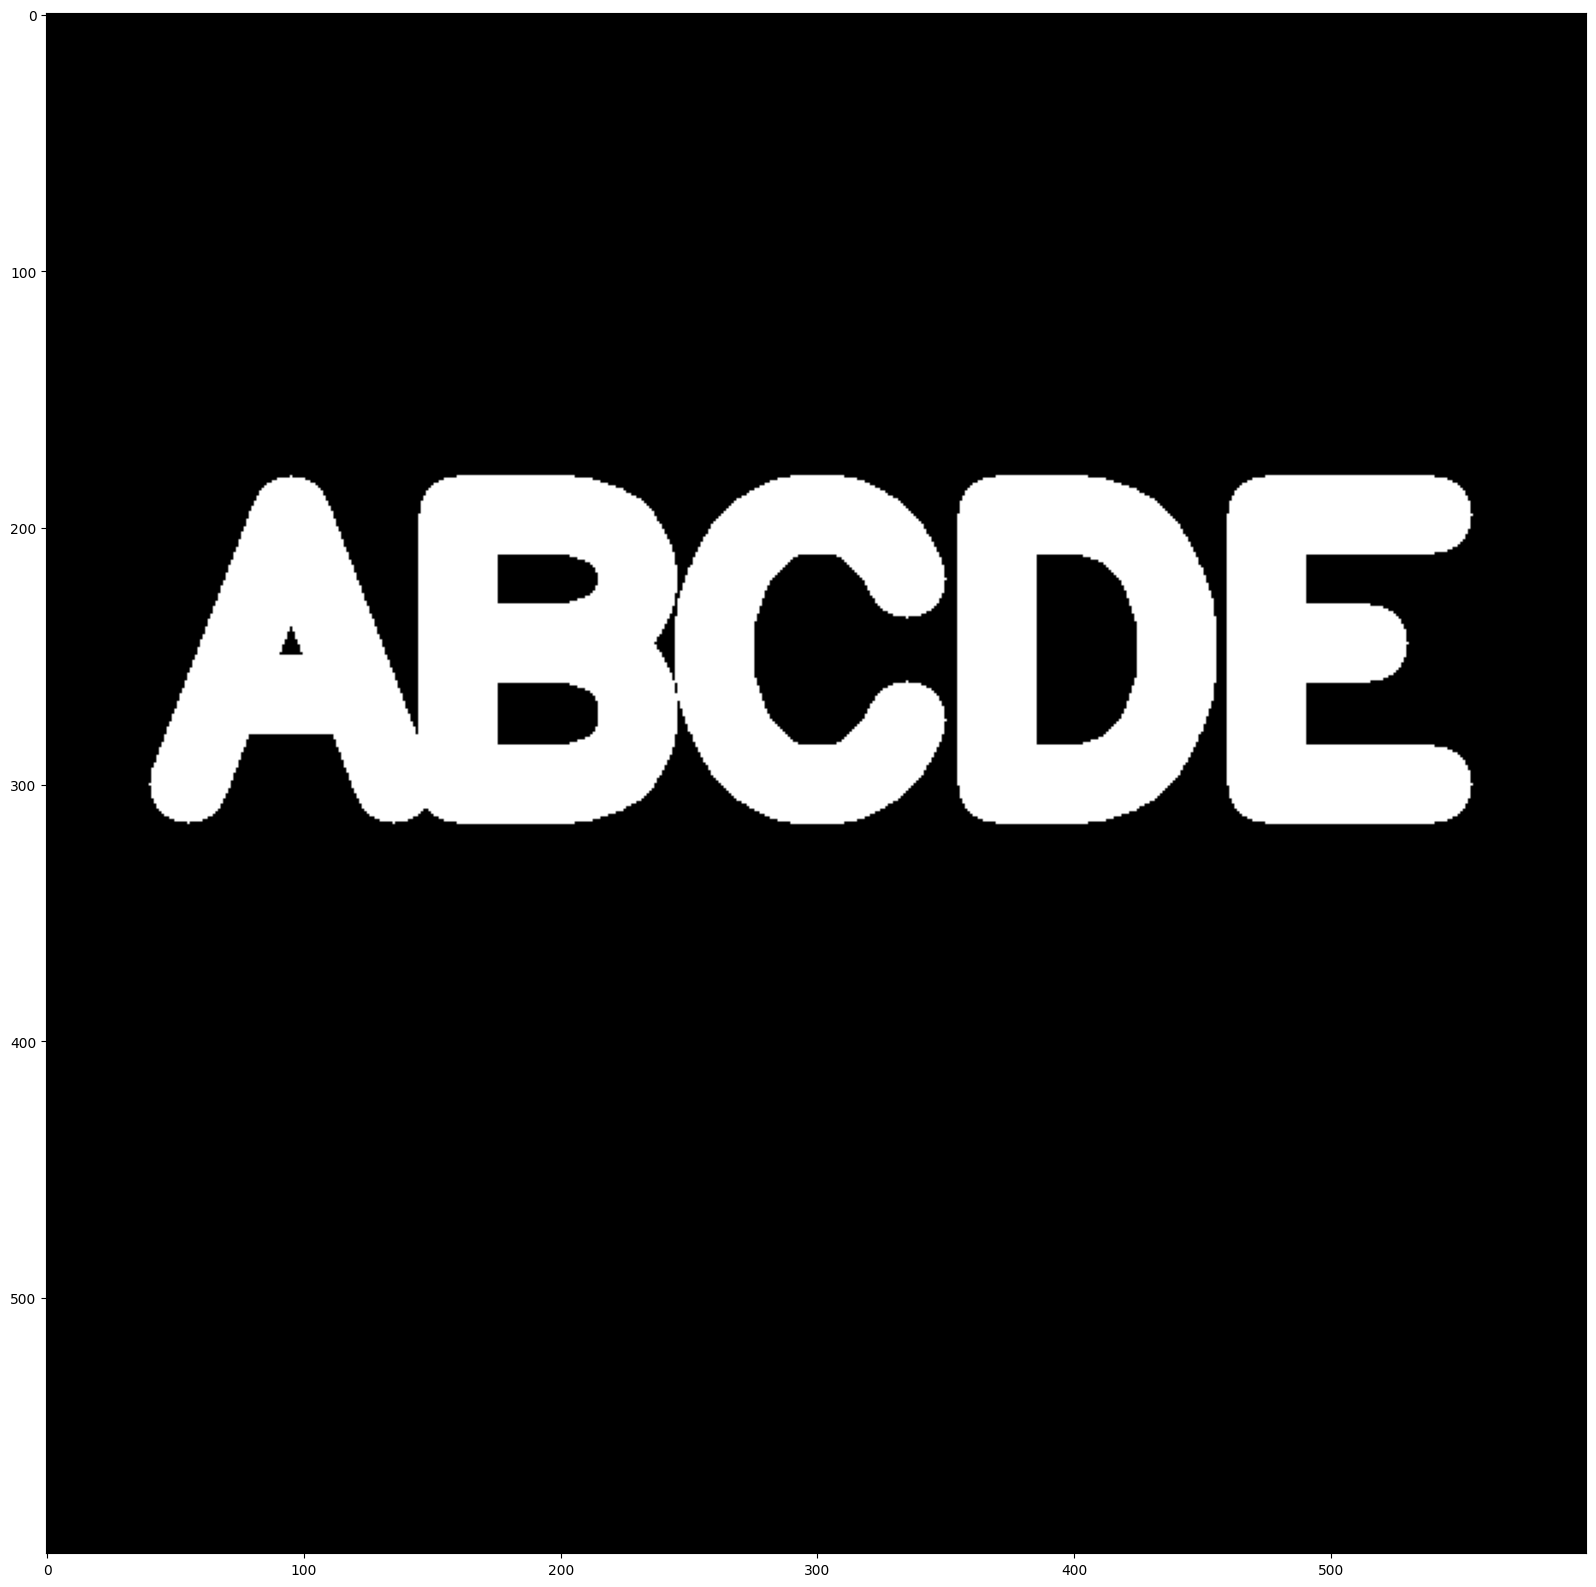

In [52]:
img = load_img()
show_image(img)

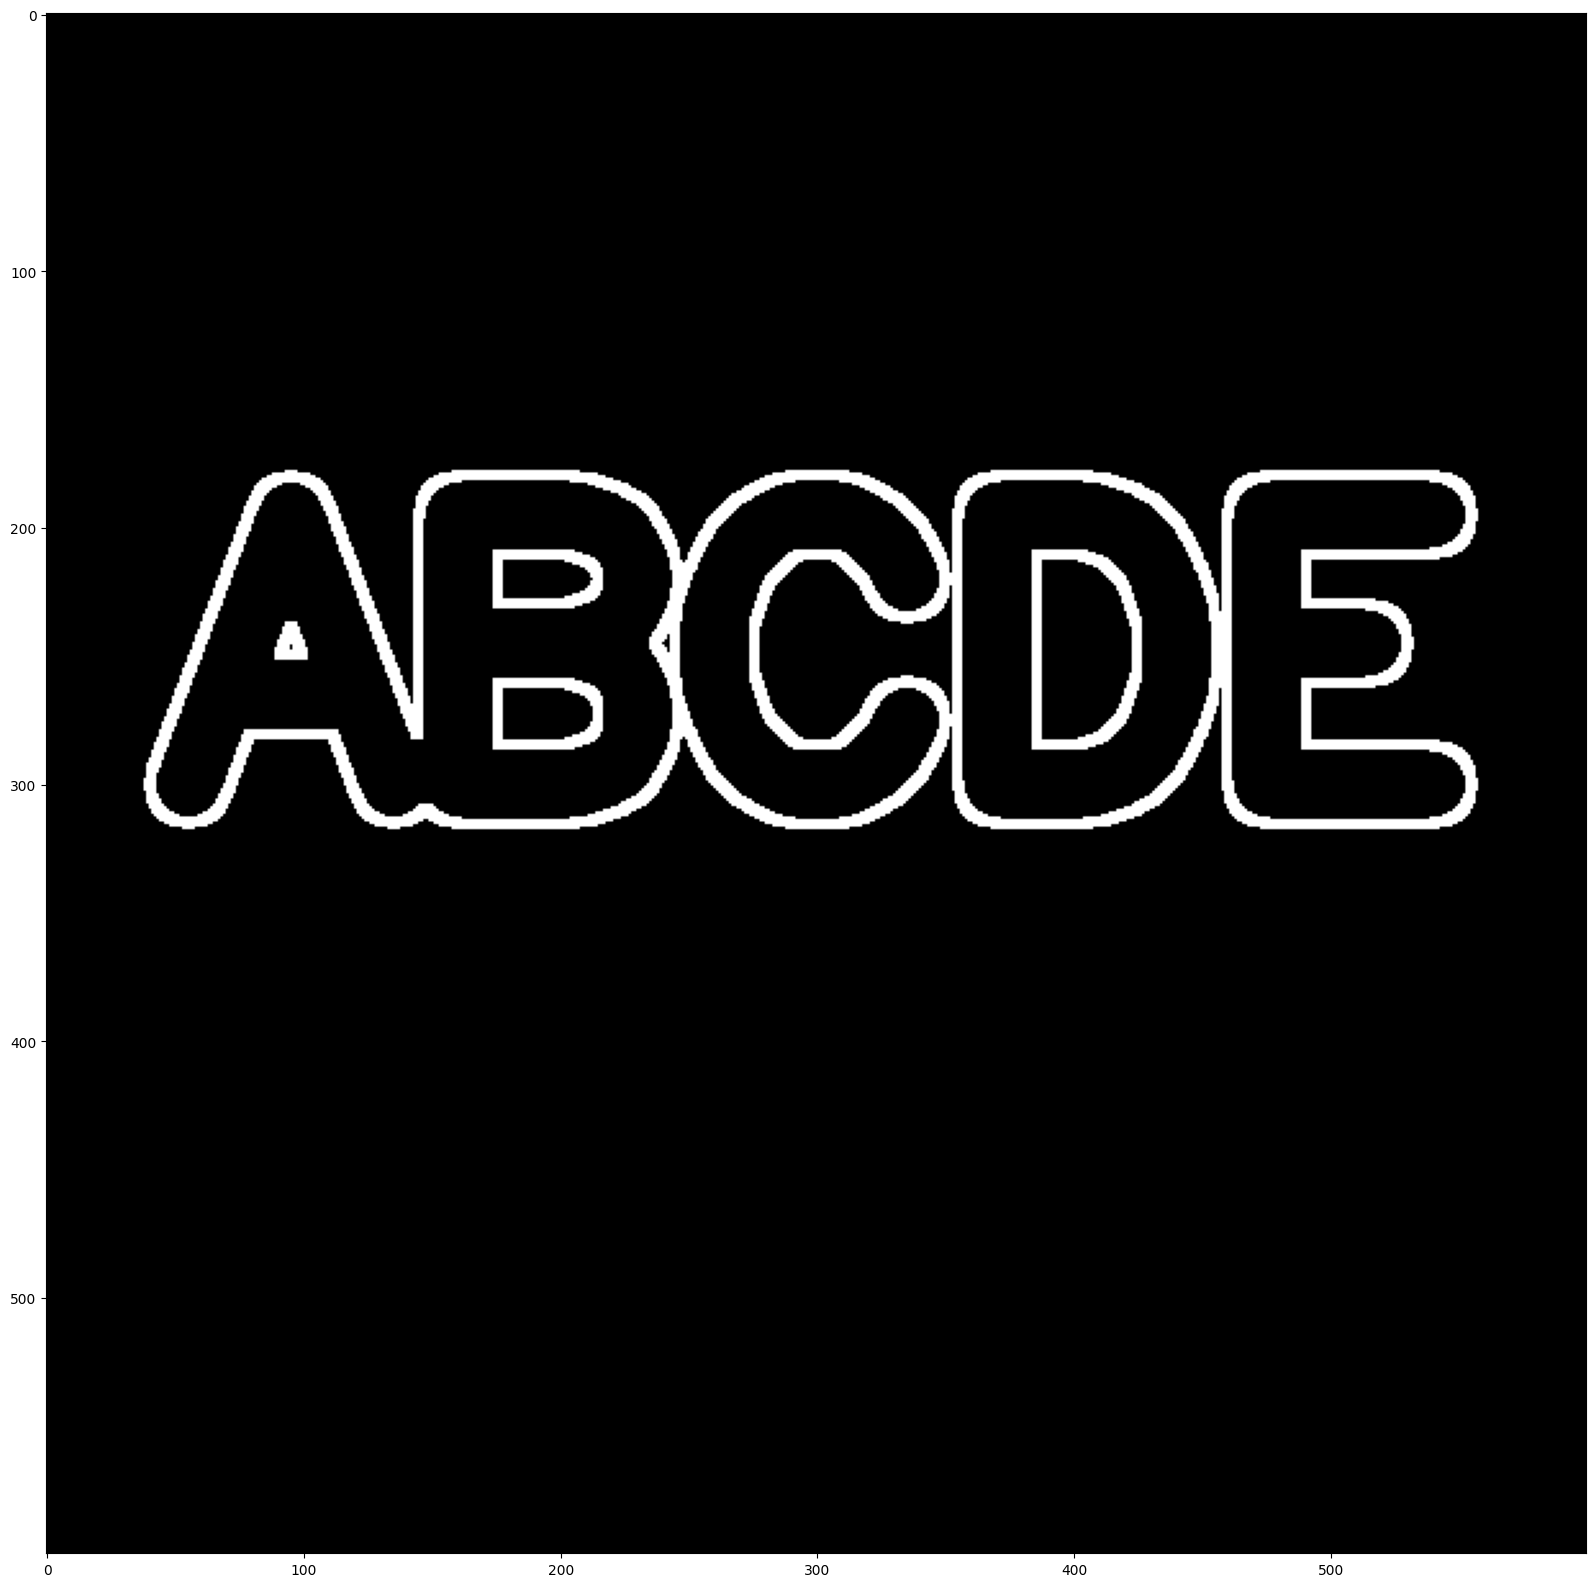

In [53]:
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
show_image(gradient)